# **Umair Ahmad** 
# **21i-2081** 

This is an R Markdown Notebook. When you execute code within the notebook, the results appear beneath the code.

Try executing this chunk by clicking the Run button within the chunk or by placing your cursor inside it and pressing Ctrl+Shift+Enter.

# **DS-5003/2003 Statistical and Mathematical tools for Data Science (Fall 2021)**
We are required to break our analysis  into descriptive statistics to construct the answer.
Road detection is of important part for the traveling comfort
and driving safety.
The data collected by smartphone sensors to detect road conditions in
real-time.

Global Positioning System (GPS)

Accelerometer (x, y, z-axis values)

Gyroscope (x, y, z-axis values)

Overall travel distance can be obtained using GPS sensor.

Accelerometers in smartphones are used to detect the
orientation of the phone (vertical displacement).

The gyroscope adds an additional dimension to the information
supplied by the accelerometer by tracking rotation or twist.



# **Problem Statment**

**Question 1:** Accelerometer sensor when reading augmented with Gyro sensor data has a better chance of detecting the road condition.?

**Question 2:** Which accelerometer readings better explain the road conditions?

**Question 3:** Experimental data is showing mostly bad road conditions at high speed. Verify this
claim?


**Question 4.** Time of the recording is closely correlated with the road condition?

**Question 5:** From all the given sensor values pick the best 5 that you think predict the road
condition the best?


# **Importing Libraries**


In [8]:
library('MASS')
install.packages("caret")
library('caret')

library('ggplot2') # visualization
install.packages("ggthemes")
library('ggthemes') # visualization
library('scales') # visualization
library('plyr'); library('dplyr')
library('tidyr') # data manipulation
install.packages("gridExtra")
library('gridExtra')
install.packages("corrplot")
library('corrplot')

library('stringr')
library('data.table')
install.packages("zoo")
library('zoo')
install.packages("cowplot")
library(cowplot)
install.packages("gginference")
library(gginference)
set.seed(2017)
select <- dplyr::select
options(digits.secs=6)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Data Reading for Analysis using R Function "fread.csv" 

In [21]:
#Data Reading
#Load Data
df <- fread('/content/TrainingData.csv', stringsAsFactors=TRUE)

# Getting some Trends from different Sensors

In [91]:
head(df)

Acceleromete_X,Acceleromete_Y,Acceleromete_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,gravity_X,gravity_Y,gravity_Z,Magnetic_X,⋯,Rotational_7,Rotational_8,Rotational_9,Latitude,Longitude,Date,Timer,Speed,Road_Condition,TimeStamp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<int>,<int>,<fct>
-0.66800267,0.4836435,11.408719,-0.02398562,-0.007432398,-0.001247998,0.2851878,-0.6957125,9.777783,-1.02,⋯,0.02908106,-0.07094292,0.9970564,34.56032,72.02388,27-01-2021-02-55-18,5:04,22,1,55:18.5
-0.16759923,-0.9912298,11.504491,-0.05575062,0.004174042,-0.001247998,0.2851878,-0.6957125,9.777783,-1.02,⋯,0.02908106,-0.07094292,0.9970564,34.56032,72.02388,27-01-2021-02-55-18,5:04,22,1,55:18.5
-0.85954463,-2.1955500,9.182044,-0.08323956,-0.009264993,0.009747577,0.2839372,-0.6982102,9.777641,-0.18,⋯,0.02895354,-0.07119762,0.9970419,34.56032,72.02388,27-01-2021-02-55-18,5:04,22,1,55:18.5
-1.32642830,0.9074302,7.166065,-0.13516310,-0.008043262,0.001195463,0.2839372,-0.6982102,9.777641,-0.18,⋯,0.02895354,-0.07119762,0.9970419,34.56032,72.02388,27-01-2021-02-55-18,5:04,22,1,55:18.5
0.87869880,1.1947432,8.767835,-0.03253774,-0.067297190,0.000585000,0.2839045,-0.7035975,9.777256,-0.66,⋯,0.02895020,-0.07174698,0.9970026,34.56032,72.02388,27-01-2021-02-55-18,5:04,22,1,55:18.5
-0.08140534,-0.0191542,11.442240,0.02182927,-0.026369222,0.006082385,0.2855660,-0.7163356,9.776282,-0.60,⋯,0.02911962,-0.07304591,0.9969034,34.56032,72.02388,27-01-2021-02-55-18,5:04,22,1,55:18.5


In [17]:
str(df)

Classes ‘data.table’ and 'data.frame':	432774 obs. of  31 variables:
 $ Acceleromete_X: num  -0.668 -0.168 -0.86 -1.326 0.879 ...
 $ Acceleromete_Y: num  0.484 -0.991 -2.196 0.907 1.195 ...
 $ Acceleromete_Z: num  11.41 11.5 9.18 7.17 8.77 ...
 $ Gyroscope_X   : num  -0.024 -0.0558 -0.0832 -0.1352 -0.0325 ...
 $ Gyroscope_Y   : num  -0.00743 0.00417 -0.00926 -0.00804 -0.0673 ...
 $ Gyroscope_Z   : num  -0.001248 -0.001248 0.009748 0.001195 0.000585 ...
 $ gravity_X     : num  0.285 0.285 0.284 0.284 0.284 ...
 $ gravity_Y     : num  -0.696 -0.696 -0.698 -0.698 -0.704 ...
 $ gravity_Z     : num  9.78 9.78 9.78 9.78 9.78 ...
 $ Magnetic_X    : num  -1.02 -1.02 -0.18 -0.18 -0.66 ...
 $ Magnetic_Y    : num  -22.1 -22.1 -22.5 -22.5 -22 ...
 $ Magnetic_Z    : num  -23.8 -23.8 -23.9 -23.9 -23.5 ...
 $ Orientation_X : num  179 179 179 179 179 ...
 $ Orientation_Y : num  4.07 4.07 4.08 4.08 4.11 ...
 $ Orientation_Z : num  1.67 1.67 1.66 1.66 1.66 ...
 $ Rotational_1  : num  -0.999 -0.999 -0.99

In [18]:
summary(df)

 Acceleromete_X      Acceleromete_Y     Acceleromete_Z     Gyroscope_X       
 Min.   :-19.27152   Min.   :-60.6254   Min.   :-25.312   Min.   :-4.665522  
 1st Qu.: -0.79729   1st Qu.: -1.4581   1st Qu.:  8.567   1st Qu.:-0.046425  
 Median :  0.03113   Median : -0.2634   Median :  9.651   Median : 0.001671  
 Mean   :  0.01429   Mean   : -0.2203   Mean   :  9.660   Mean   : 0.002376  
 3rd Qu.:  0.77335   3rd Qu.:  1.0008   3rd Qu.: 10.724   3rd Qu.: 0.049318  
 Max.   : 20.73681   Max.   : 22.9204   Max.   : 69.592   Max.   : 3.126246  
                                                                             
  Gyroscope_Y         Gyroscope_Z          gravity_X           gravity_Y       
 Min.   :-5.502371   Min.   :-3.051909   Min.   :-6.077750   Min.   :-8.15085  
 1st Qu.:-0.041135   1st Qu.:-0.039573   1st Qu.:-0.415713   1st Qu.:-1.02391  
 Median :-0.000102   Median :-0.001859   Median : 0.069913   Median : 0.06914  
 Mean   :-0.000602   Mean   :-0.003633   Mean   : 0.0016

# **Question 1**
**Accelerometer sensor when reading augmented with Gyro sensor data has a better
chance of detecting the road condition.**

In this question we have to check whether Accelerometer sensor readings alone produce good results for detecting road condtion or it perform better when Augment with Gyro sensors.

# **Visualize trends in both sensor reading with road conditions**

In [10]:
df$Road_Condition <- as.factor(df$Road_Condition)

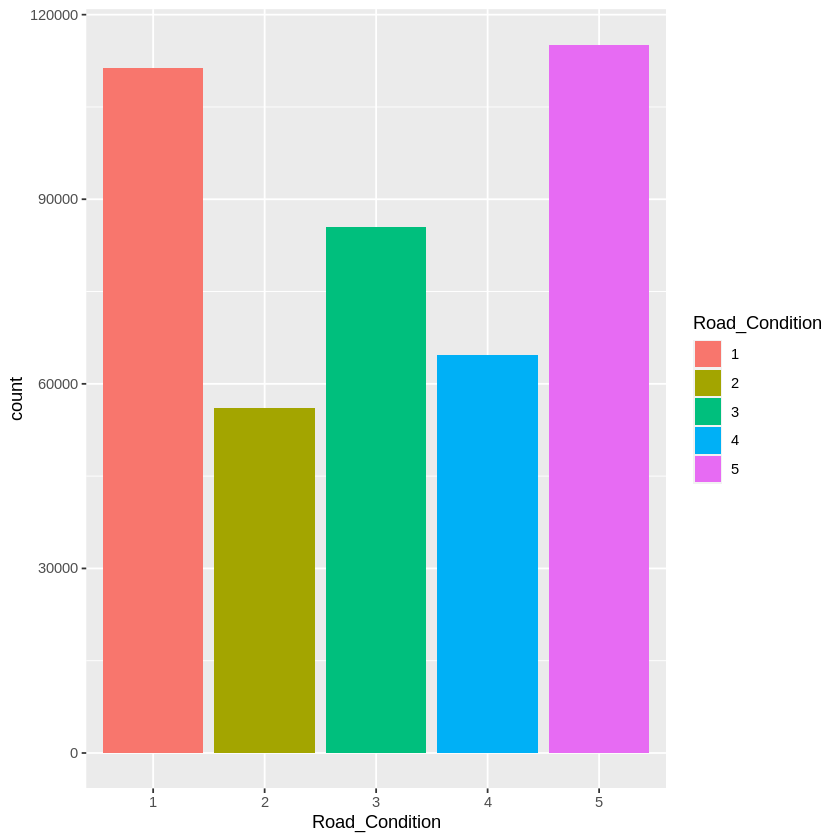

In [20]:
df %>% 
  ggplot(aes(x=Road_Condition, fill=Road_Condition)) +
  geom_bar()

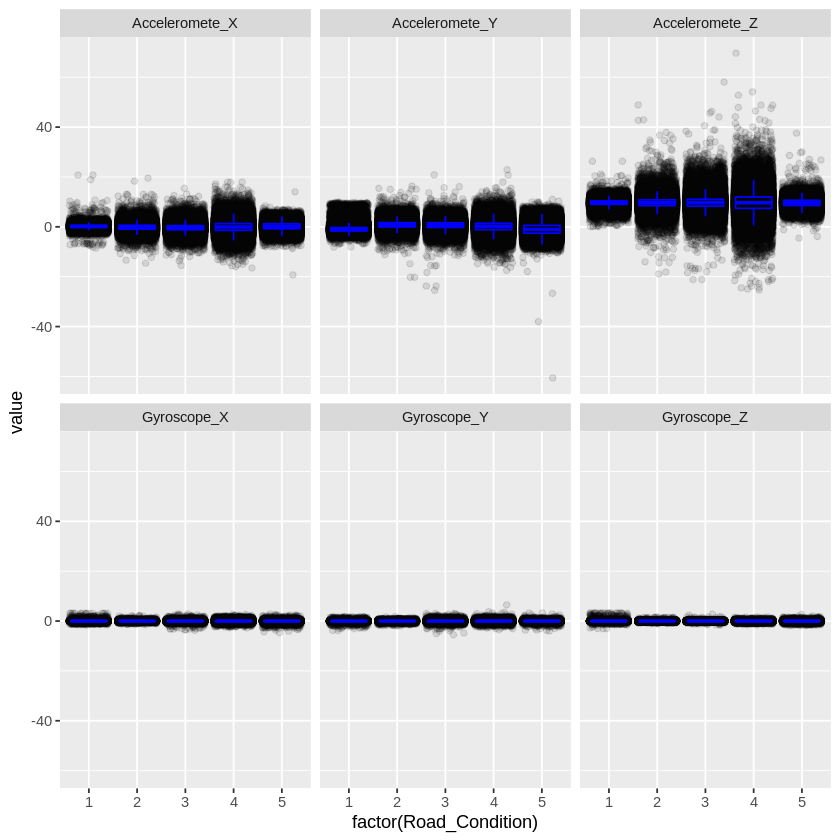

In [21]:
df %>%
    gather( sensor, value, Acceleromete_X:Gyroscope_Z) %>%
    ggplot( aes(x = factor(Road_Condition), y = value)) + 
    geom_jitter(alpha = 0.1) + geom_boxplot(color = "blue", outlier.colour = NA, fill = NA) +
    facet_wrap(~sensor)

# After looking at the Boxplot we can clearly make comments on mean of different sensors
# Acceleromete X and Y have same mean on zero but Z axis means is high
# However Gyro X, Y and Z mean are same

Warning message:
“Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned.”


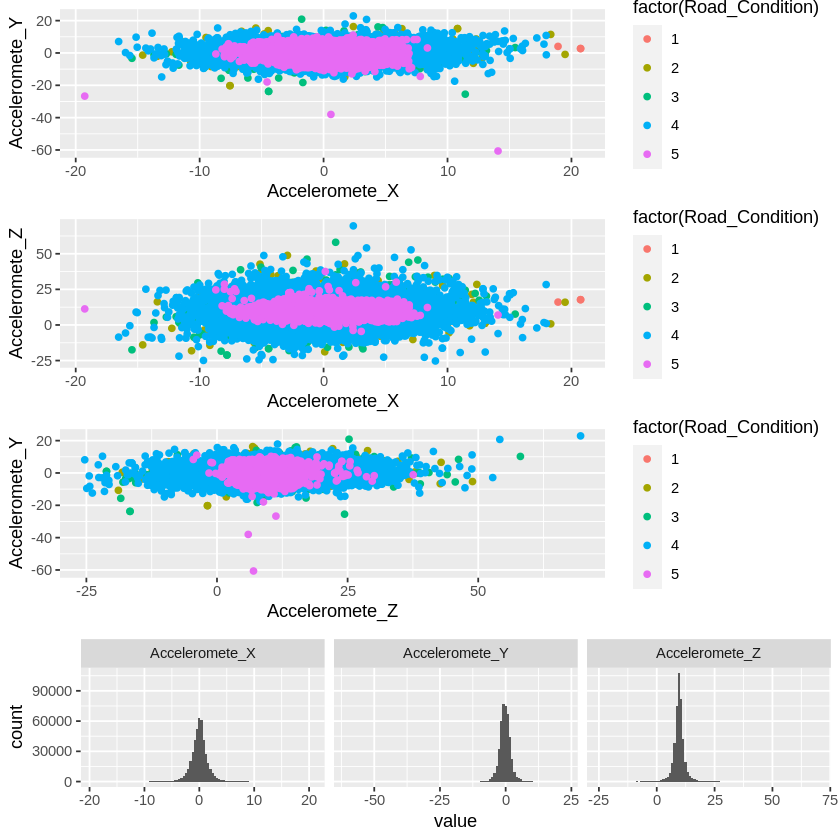

In [44]:
p1 <- ggplot(df, aes(x = Acceleromete_X, y = Acceleromete_Y, colour = factor(Road_Condition))) + 
      geom_point()
p2 <- ggplot(df, aes(x = Acceleromete_X, y = Acceleromete_Z, colour = factor(Road_Condition))) + 
      geom_point()
p3 <- ggplot(df, aes(x = Acceleromete_Z, y = Acceleromete_Y, colour = factor(Road_Condition))) + 
      geom_point()
p4 <- gather(df, sensor, value, Acceleromete_X:Acceleromete_Z) %>%
      ggplot(aes(x =value)) + geom_histogram(bins = 100) + 
      facet_grid(. ~ sensor, scales = "free_x")

plot_grid(p1, p2, p3,p4, align = "v", nrow = 4)

# By looking at the graph above and below we can claim that data is can be linearly modeled because of its spread,

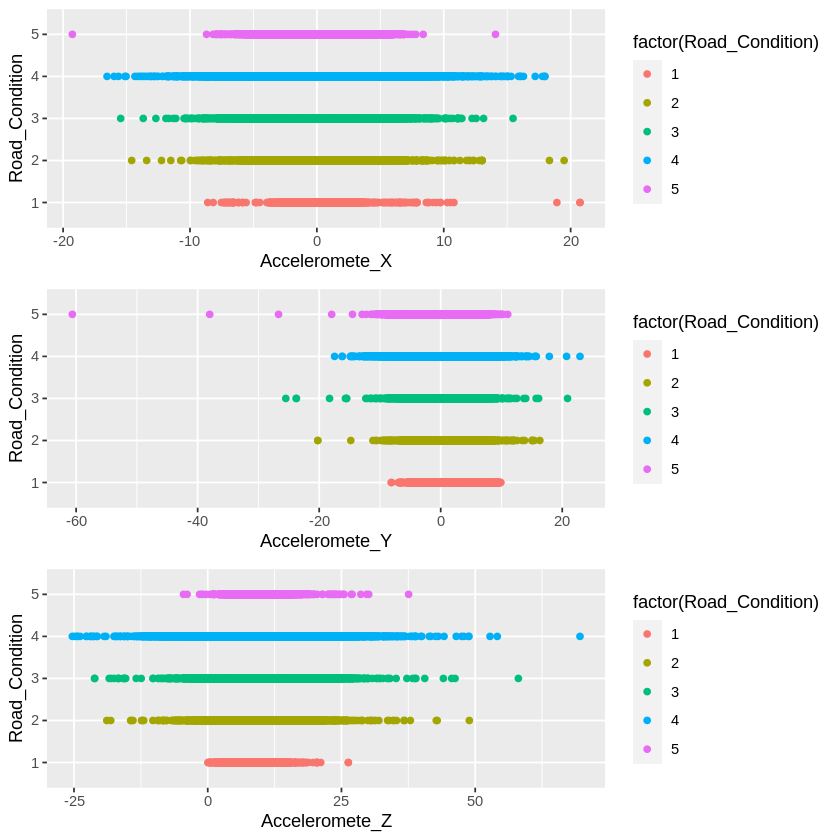

In [45]:
p1 <- ggplot(df, aes(x = Acceleromete_X, y = Road_Condition, colour = factor(Road_Condition))) + 
      geom_point()
p2 <- ggplot(df, aes(x = Acceleromete_Y, y = Road_Condition, colour = factor(Road_Condition))) + 
      geom_point()
p3 <- ggplot(df, aes(x = Acceleromete_Z, y = Road_Condition, colour = factor(Road_Condition))) + 
      geom_point()


plot_grid(p1, p2, p3 , align = "v", nrow = 3)

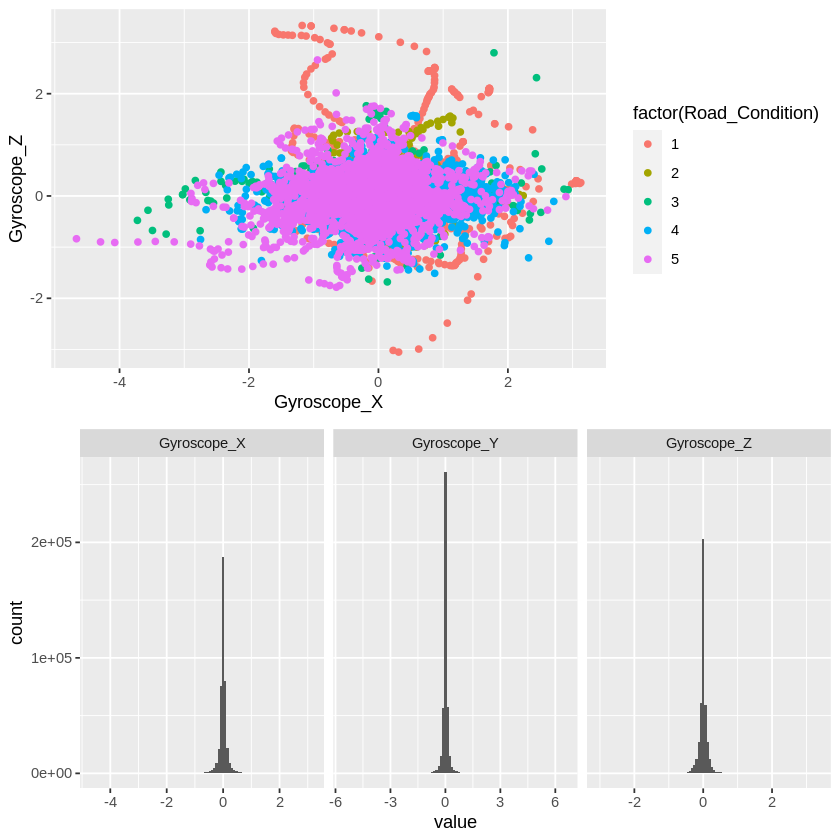

In [24]:
p1 <- ggplot(df, aes(x = Gyroscope_X, y = Gyroscope_Z, colour = factor(Road_Condition))) + 
      geom_point()

p2 <- gather(df, sensor, value, Gyroscope_X:Gyroscope_Z) %>%
      ggplot(aes(x =value)) + geom_histogram(bins = 100) + 
      facet_grid(. ~ sensor, scales = "free_x")

grid.arrange(p1, p2)

In [58]:
df$Road_Condition <- as.numeric(df$Road_Condition)

# Corelations between Sensors and Road Condition

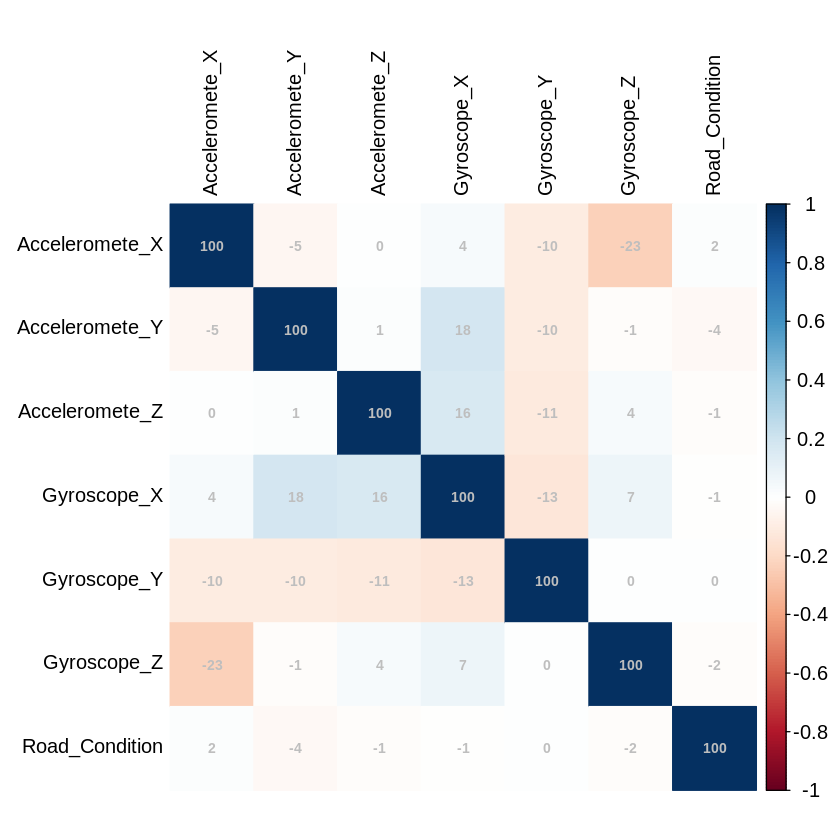

In [59]:
corrDftps <- cor(select(df, Acceleromete_X,Acceleromete_Y,Acceleromete_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,Road_Condition))
cex.before <- par("cex")
par(cex = 0.7)
corrplot(corrDftps, 
         insig = "blank", 
         method = "color",
                  
         addCoef.col="grey", 
         order = "alphabet", 
         tl.col="black", # colour of text label
         tl.cex = 1/par("cex"),
         cl.cex = 1/par("cex"), 
         addCoefasPercent = TRUE)

In [88]:
df$Road_Condition <- as.factor(df$Road_Condition)

# Applying Linear Model

In [92]:
Acc_fit <- lm(df$Road_Condition ~ df$Acceleromete_X + df$Acceleromete_Y + df$Acceleromete_Z)
summary(fit)
anova(Acc_fit)


Call:
lm(formula = df$Road_Condition ~ df$Acceleromete_X + df$Acceleromete_Y + 
    df$Acceleromete_Z + df$Gyroscope_X + df$Gyroscope_Y + df$Gyroscope_Z)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.71934 -1.98504  0.00457  1.81769  2.44687 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.0933333  0.0091061 339.699  < 2e-16 ***
df$Acceleromete_X  0.0130449  0.0015306   8.522  < 2e-16 ***
df$Acceleromete_Y -0.0292113  0.0011567 -25.254  < 2e-16 ***
df$Acceleromete_Z -0.0065764  0.0009117  -7.214 5.46e-13 ***
df$Gyroscope_X     0.0182859  0.0138610   1.319   0.1871    
df$Gyroscope_Y    -0.0274060  0.0132273  -2.072   0.0383 *  
df$Gyroscope_Z    -0.1921611  0.0184773 -10.400  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.538 on 432767 degrees of freedom
Multiple R-squared:  0.002227,	Adjusted R-squared:  0.002213 
F-statistic:   161 on 6 and 432767 DF,  p-value:

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
df$Acceleromete_X,1,394.5231,394.523132,166.71821,3.917760e-38
df$Acceleromete_Y,1,1498.6207,1498.620726,633.28951,1.214012e-139
df$Acceleromete_Z,1,126.5409,126.540859,53.47384,2.625092e-13
Residuals,432770,1024109.9603,2.366407,NA,NA


In [62]:
fit <- lm(df$Road_Condition ~ df$Acceleromete_X + df$Acceleromete_Y + df$Acceleromete_Z+ df$Gyroscope_X + df$Gyroscope_Y + df$Gyroscope_Z)
summary(fit)
anova(fit)


Call:
lm(formula = df$Road_Condition ~ df$Acceleromete_X + df$Acceleromete_Y + 
    df$Acceleromete_Z + df$Gyroscope_X + df$Gyroscope_Y + df$Gyroscope_Z)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.71934 -1.98504  0.00457  1.81769  2.44687 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.0933333  0.0091061 339.699  < 2e-16 ***
df$Acceleromete_X  0.0130449  0.0015306   8.522  < 2e-16 ***
df$Acceleromete_Y -0.0292113  0.0011567 -25.254  < 2e-16 ***
df$Acceleromete_Z -0.0065764  0.0009117  -7.214 5.46e-13 ***
df$Gyroscope_X     0.0182859  0.0138610   1.319   0.1871    
df$Gyroscope_Y    -0.0274060  0.0132273  -2.072   0.0383 *  
df$Gyroscope_Z    -0.1921611  0.0184773 -10.400  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.538 on 432767 degrees of freedom
Multiple R-squared:  0.002227,	Adjusted R-squared:  0.002213 
F-statistic:   161 on 6 and 432767 DF,  p-value:

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
df$Acceleromete_X,1,3.945231e+02,394.523132,166.7603323,3.835656e-38
df$Acceleromete_Y,1,1.498621e+03,1498.620726,633.4495242,1.120657e-139
df$Acceleromete_Z,1,1.265409e+02,126.540859,53.4873471,2.607101e-13
df$Gyroscope_X,1,9.355650e-01,0.935565,0.3954524,5.294475e-01
df$Gyroscope_Y,1,8.988194e+00,8.988194,3.7992047,5.127758e-02
df$Gyroscope_Z,1,2.558770e+02,255.876956,108.1562088,2.501230e-25
Residuals,432767,1.023844e+06,2.365809,NA,NA


# **Question 1 Conculsion**
After analysis the R2 value of both models with and with Gyro reading along with Acceleromete reading.

The R2 value with Gyro=0.002227

The R2 value without Gyro=0.001968

The R2 error is less in seconde case so, we can say that Accelerometer sensor when reading without with Gyro sensor data has a better
chance of detecting the road condition.

# **Question 2**
**Which accelerometer readings better explain the road conditions.**

In this question we have to check which Accelerometer sensor readings can produce good results for detecting road condtion.

# Analyse some trends in data

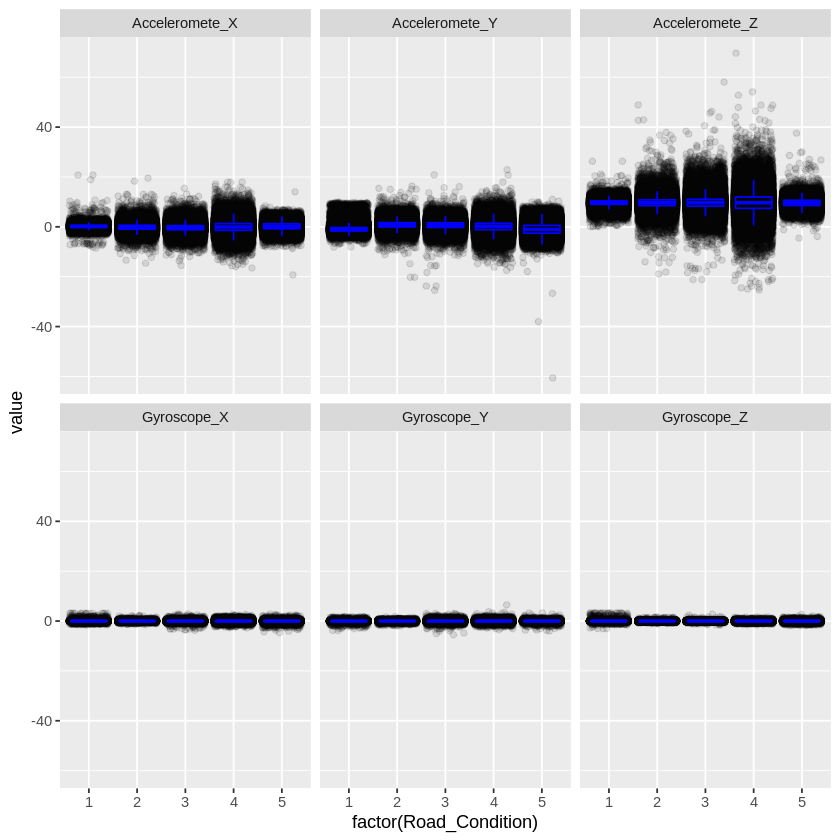

In [ ]:
df %>%
    gather( sensor, value, Acceleromete_X:Gyroscope_Z) %>%
    ggplot( aes(x = factor(Road_Condition), y = value)) + 
    geom_jitter(alpha = 0.1) + geom_boxplot(color = "blue", outlier.colour = NA, fill = NA) +
    facet_wrap(~sensor)

1. After looking at the Boxplot we can clearly make comments on mean of different sensors.

2. Acceleromete X and Y have same mean on zero but Z axis means is high.

3. However Gyro X, Y and Z mean are same.

To statistically proof that we can use Anova test

# Anova Test for Question 2

For Hypothesis **testing condition checking**

For this we’ll see following steps:

1. ANOVA assumes that the data is normally distributed. 
2. The ANOVA also assumes homogeneity of variance, which means that the variance among the groups should be approximately equal.
3. ANOVA also assumes that the observations are independent of each other.

By seeing box plot and describe function we can say that it meet the Anova assumptions so we can go for Anova test

In [107]:
pop_mean=mean(df$Acceleromete_Z)

In [108]:
pop_mean

[1] 9.660277

# **Stating hypothesis**
**Solution**

**Step 1:** Formulate Null and Alternative Hypothesis

Null hypothesis states that mean of all groups are same.Whereas alternate hypothesis states that atleast one group is different.

1. HO:μ1=μ2=μ3
2. HA: Not all population means are equal



**Step 2:** Set significance level and Sample data conditions check

1. alpha=0.05

We’ll use default value of Significance Level, As it is a one tailed test, so our alpha <- 0.05. Now perform a condition check. 

**Step 3:** Calculate Anova

**Step 4:** Draw Conculsion

Performing hypothesis test

In [5]:
#**Step 3:** Calculate Anova
temp <- aov(Road_Condition ~ Acceleromete_X + Acceleromete_Y +Acceleromete_Z, data=df)
summary(temp)

                   Df  Sum Sq Mean Sq F value   Pr(>F)    
Acceleromete_X      1     395   394.5  166.72  < 2e-16 ***
Acceleromete_Y      1    1499  1498.6  633.29  < 2e-16 ***
Acceleromete_Z      1     127   126.5   53.47 2.63e-13 ***
Residuals      432770 1024110     2.4                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# **Step 4 Anova Draw Conclusion**

As you can see from the three outputs of anova test above, the test statistic (F = in the first two (X,Y) ) and the p-value (p-value in the first the first two (X,Y)) are exactly the same for both Acceleromete_X and Acceleromete_Y sensors, which means that in case of equal variances, results and conclusions will be unchanged.
But in Acceleromete_Z F and P value is change so we can say that it do have different means and varaince




In [113]:
pop_mean_z=mean(df$Acceleromete_Z)
pop_mean_y=mean(df$Acceleromete_Y)
pop_mean_x=mean(df$Acceleromete_X)

In [114]:
pop_mean_z

[1] 9.660277

In [115]:
pop_mean_x

[1] 0.01429195

In [117]:
pop_mean_y

[1] -0.2202932

# **Question 2 Conclusion**
After all tha anaylsis we can say that the sensor reading of Acceleromete_X and Acceleromete_Y that best predicit the road condtions are the mean value which is in this case is zero and Acceleromete_Z's means value=9.66

1. Acceleromete_X=0.014 

2. Acceleromete_Y=-0.22

3. Acceleromete_Z=9.66

# **Question 3**
**Experimental data is showing mostly bad road conditions at high speed.**

In this question we have to check is there any reltionship between road condition and speed specificaly need to prove that either bad conditions can have any link with the driving fast.

# **Binning the Speed Variable**
From the summary we can see that minimum age is 0 and maximum is 119. We can divide this into three groups.



1.   0<= Speed <=40 - Slow
2.   40< Speed <=80 - Normal
3.   80< Speed <=120  - High





In [122]:
# New column with the name agegroup will be created here 
df <- df %>% mutate(Speed = case_when(Speed >= 0  & Speed <= 40 ~ 'Slow', Speed > 40  & Speed <= 80 ~ 'Normal', Speed >80  & Speed <= 120 ~ 'High'))
head(df)

Acceleromete_X,Acceleromete_Y,Acceleromete_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,gravity_X,gravity_Y,gravity_Z,Magnetic_X,⋯,Rotational_7,Rotational_8,Rotational_9,Latitude,Longitude,Date,Timer,Speed,Road_Condition,TimeStamp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<int>,<fct>
-0.66800267,0.4836435,11.408719,-0.02398562,-0.007432398,-0.001247998,0.2851878,-0.6957125,9.777783,-1.02,⋯,0.02908106,-0.07094292,0.9970564,34.56032,72.02388,27-01-2021-02-55-18,5:04,Slow,1,55:18.5
-0.16759923,-0.9912298,11.504491,-0.05575062,0.004174042,-0.001247998,0.2851878,-0.6957125,9.777783,-1.02,⋯,0.02908106,-0.07094292,0.9970564,34.56032,72.02388,27-01-2021-02-55-18,5:04,Slow,1,55:18.5
-0.85954463,-2.1955500,9.182044,-0.08323956,-0.009264993,0.009747577,0.2839372,-0.6982102,9.777641,-0.18,⋯,0.02895354,-0.07119762,0.9970419,34.56032,72.02388,27-01-2021-02-55-18,5:04,Slow,1,55:18.5
-1.32642830,0.9074302,7.166065,-0.13516310,-0.008043262,0.001195463,0.2839372,-0.6982102,9.777641,-0.18,⋯,0.02895354,-0.07119762,0.9970419,34.56032,72.02388,27-01-2021-02-55-18,5:04,Slow,1,55:18.5
0.87869880,1.1947432,8.767835,-0.03253774,-0.067297190,0.000585000,0.2839045,-0.7035975,9.777256,-0.66,⋯,0.02895020,-0.07174698,0.9970026,34.56032,72.02388,27-01-2021-02-55-18,5:04,Slow,1,55:18.5
-0.08140534,-0.0191542,11.442240,0.02182927,-0.026369222,0.006082385,0.2855660,-0.7163356,9.776282,-0.60,⋯,0.02911962,-0.07304591,0.9969034,34.56032,72.02388,27-01-2021-02-55-18,5:04,Slow,1,55:18.5


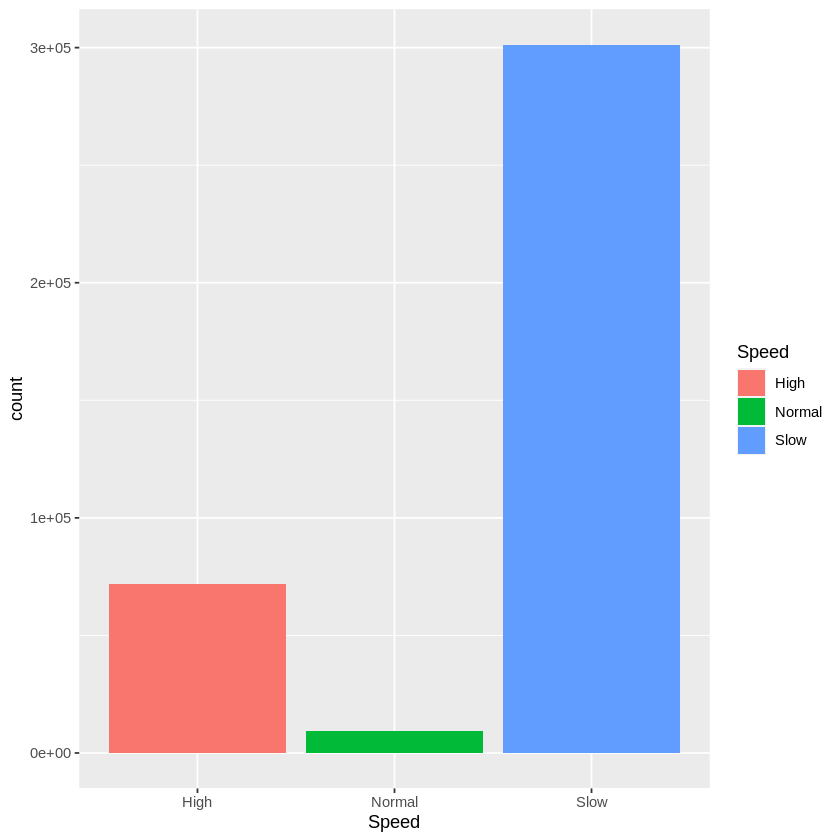

In [129]:
df %>%
  filter(Speed %in% c('High', 'Normal','Slow')) %>%
  ggplot(aes(x=Speed,fill=Speed)) + geom_bar()

# Now Both Speed and Road conditions are categorical we can apply Chi square test to verify the claim Experimental data is showing mostly bad road conditions at high speed.

# **Stating hypothesis**
**Solution**

**Step 1:** Formulate Null and Alternative Hypothesis

Ho=No relationship exists on the categorical variables in the population

Ha=There is a relationship exists on the categorical variables in the population

**Step 2:** Set significance level and Sample data conditions check

alpha=0.05
We’ll use default value of Significance Level, As it is a one tailed test, so our alpha <- 0.05. Now perform a condition check.

**Step 3:** Calculate chi-squared test

**Step 4:** Draw Conculsion

Performing hypothesis test

In [135]:
# Step 3 Calculate chi-squared test
chisq.test(df$Speed, df$Road_Condition, correct=FALSE)


	Pearson's Chi-squared test

data:  df$Speed and df$Road_Condition
X-squared = 231013, df = 8, p-value < 2.2e-16


# **Question 3 Draw Conclusion**

We have a chi-squared value of  2.2e-16. Since we get a p-Value less than the significance level of 0.05, we reject the null hypothesis and conclude that the two variables are in fact dependent.

p-value being **Less than alpha we reject null hypothesis** and conclude with 95% confidence level that Experimental data is showing mostly bad road conditions at high speed.

# **Question 4**
Time of the recording is closely correlated with the road condition

# Anova Test for Question 4

For Hypothesis **testing condition checking**

For this we’ll see following steps:

1. ANOVA assumes that the data is normally distributed. 
2. The ANOVA also assumes homogeneity of variance, which means that the variance among the groups should be approximately equal.
3. ANOVA also assumes that the observations are independent of each other.

By seeing box plot and describe function we can say that it meet the Anova assumptions so we can go for Anova test

# **Stating hypothesis**
**Solution**

**Step 1:** Formulate Null and Alternative Hypothesis

Null hypothesis states that mean of all groups are same.Whereas alternate hypothesis states that atleast one group is different.

1. HO:μ1=μ2
2. HA: Not all population means are equal



**Step 2:** Set significance level and Sample data conditions check

1. alpha=0.05

We’ll use default value of Significance Level, As it is a one tailed test, so our alpha <- 0.05. Now perform a condition check. 

**Step 3:** Calculate Anova

**Step 4:** Draw Conculsion

Performing hypothesis test

In [6]:
# Step 3 Anova Calculation
temp <- aov(df$Road_Condition ~ df$Timer)
summary(temp)

                Df Sum Sq Mean Sq F value Pr(>F)    
df$Timer       677 289424   427.5   250.7 <2e-16 ***
Residuals   432096 736706     1.7                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# **Step 4 Draw Conclusion**

We have a F value value of 2e-16. Since we get a p-Value less than the significance level of 0.05, we reject the null hypothesis and conclude that the two variable's mean are in fact different.

p-value being Less than alpha we reject null hypothesis and conclude with 95% confidence level that Time of the recording is **not** closely correlated with the road condition.




# **Question 5**
From all the given sensor values pick the best 5 that you think predict the road
condition the best?

Apply Linear model to all the sensor and selecting the best predictors for Linear model can be the best solution for this question 

to get the best fit for a multiple regression model, it is important to include the most significant subset of predictors from the dataset. However, it can be quite challenging to understand which predictors, among a large set of predictors, have a significant influence on our target variable. This can be particularly cumbersome given that the p-value for each variable is adjusted for the other terms in the model.

Previously we have plot alot of visuals to understand the model can be get fit. here is few more samples

Warning message:
“Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned.”


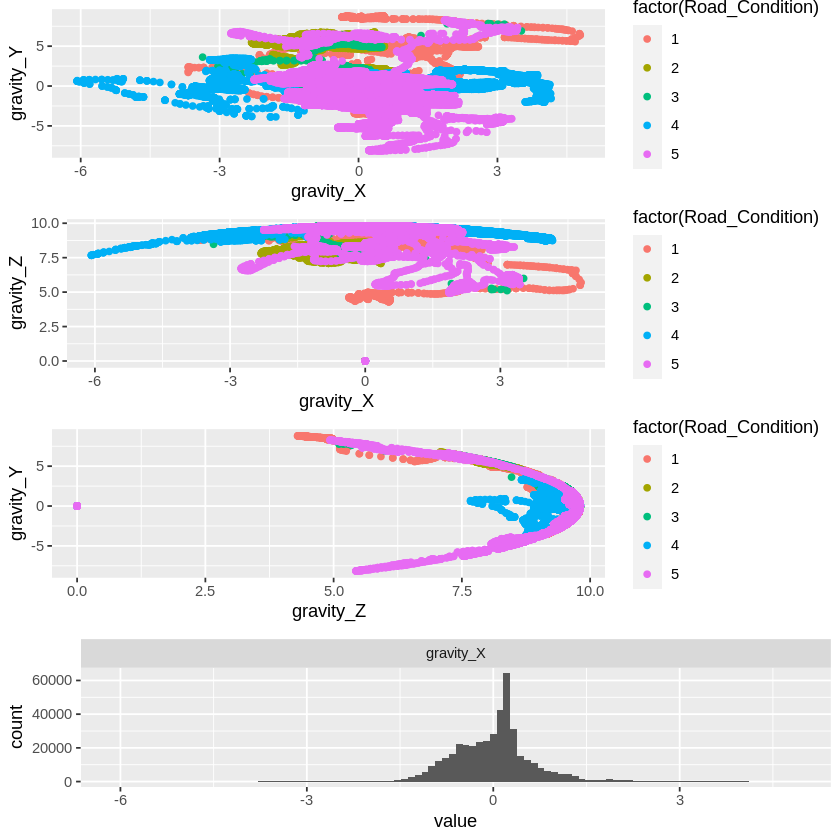

In [17]:
p1 <- ggplot(df, aes(x = gravity_X, y = gravity_Y, colour = factor(Road_Condition))) + 
      geom_point()
p2 <- ggplot(df, aes(x = gravity_X, y = gravity_Z, colour = factor(Road_Condition))) + 
      geom_point()
p3 <- ggplot(df, aes(x = gravity_Z, y = gravity_Y, colour = factor(Road_Condition))) + 
      geom_point()
p4 <- gather(df, sensor, value, gravity_X:gravity_X) %>%
      ggplot(aes(x =value)) + geom_histogram(bins = 100) + 
      facet_grid(. ~ sensor, scales = "free_x")

plot_grid(p1, p2, p3,p4, align = "v", nrow = 4)

Warning message:
“Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned.”


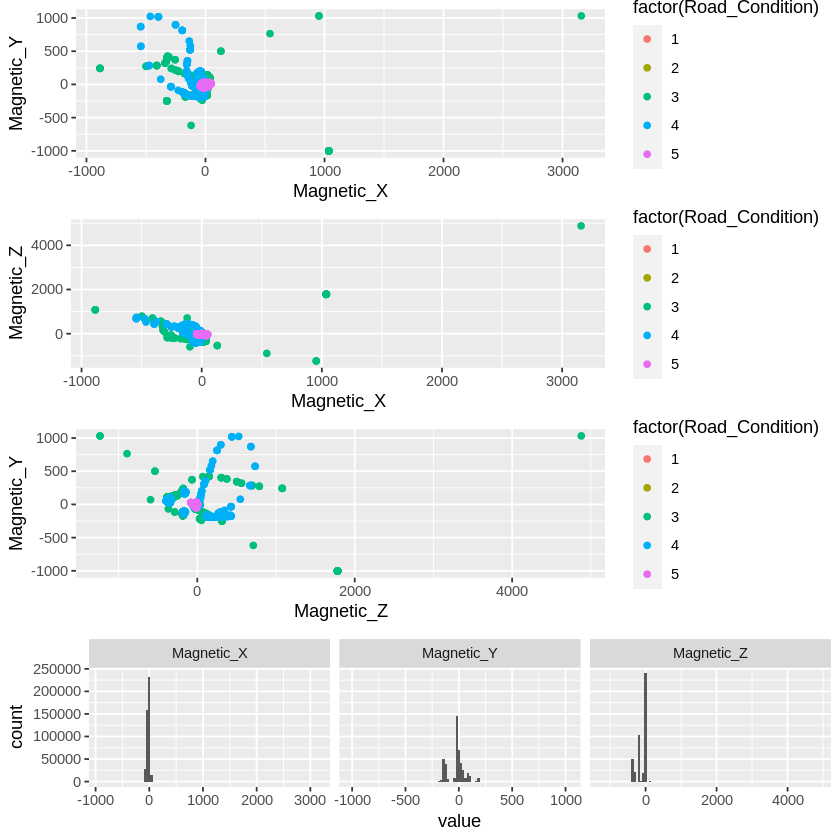

In [16]:
p1 <- ggplot(df, aes(x = Magnetic_X, y = Magnetic_Y, colour = factor(Road_Condition))) + 
      geom_point()
p2 <- ggplot(df, aes(x = Magnetic_X, y = Magnetic_Z, colour = factor(Road_Condition))) + 
      geom_point()
p3 <- ggplot(df, aes(x = Magnetic_Z, y = Magnetic_Y, colour = factor(Road_Condition))) + 
      geom_point()
p4 <- gather(df, sensor, value, Magnetic_X:Magnetic_Z) %>%
      ggplot(aes(x =value)) + geom_histogram(bins = 100) + 
      facet_grid(. ~ sensor, scales = "free_x")

plot_grid(p1, p2, p3,p4, align = "v", nrow = 4)

#Lets Fit the all models 

In [23]:
model1 <- lm(Road_Condition~Acceleromete_X,data=df)

In [24]:
model1 <- lm(Road_Condition~Acceleromete_X,data=df)
model2 <- lm(Road_Condition~Acceleromete_Y,data=df)
model3 <- lm(Road_Condition~Acceleromete_Z,data=df)

model4 <- lm(Road_Condition~Gyroscope_X,data=df) #
model5 <- lm(Road_Condition~Gyroscope_Y,data=df) #
model6 <- lm(Road_Condition~Gyroscope_Z,data=df)

model7 <- lm(Road_Condition~gravity_X,data=df)
model8 <- lm(Road_Condition~gravity_Y,data=df)#
model9 <- lm(Road_Condition~gravity_Z,data=df)

model10 <- lm(Road_Condition~Magnetic_X,data=df)
model11 <- lm(Road_Condition~Magnetic_Y,data=df)
model12 <- lm(Road_Condition~Magnetic_Z,data=df)

model13 <- lm(Road_Condition~Orientation_X,data=df)
model14 <- lm(Road_Condition~Orientation_Y,data=df)
model15 <- lm(Road_Condition~Orientation_Z,data=df)

model16 <- lm(Road_Condition~Rotational_1,data=df)
model17 <- lm(Road_Condition~Rotational_2,data=df)
model18 <- lm(Road_Condition~Rotational_3,data=df)
model19 <- lm(Road_Condition~Rotational_4,data=df)
model20 <- lm(Road_Condition~Rotational_5,data=df)
model21 <- lm(Road_Condition~Rotational_6,data=df)#
model22 <- lm(Road_Condition~Rotational_7,data=df)
model23 <- lm(Road_Condition~Rotational_8,data=df)# 
model24 <- lm(Road_Condition~Rotational_9,data=df)


In [25]:
summary(model1)


Call:
lm(formula = Road_Condition ~ Acceleromete_X, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.43171 -2.01252 -0.02561  1.91409  2.32999 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.036911   0.002340  1297.6   <2e-16 ***
Acceleromete_X 0.019039   0.001476    12.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.54 on 432772 degrees of freedom
Multiple R-squared:  0.0003845,	Adjusted R-squared:  0.0003822 
F-statistic: 166.5 on 1 and 432772 DF,  p-value: < 2.2e-16


In [26]:
summary(model2)


Call:
lm(formula = Road_Condition ~ Acceleromete_Y, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.26829 -1.99144 -0.00336  1.83945  2.29044 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.030767   0.002352 1288.54   <2e-16 ***
Acceleromete_Y -0.029127   0.001130  -25.77   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.539 on 432772 degrees of freedom
Multiple R-squared:  0.001532,	Adjusted R-squared:  0.00153 
F-statistic: 664.1 on 1 and 432772 DF,  p-value: < 2.2e-16


In [27]:
summary(model3)


Call:
lm(formula = Road_Condition ~ Acceleromete_Z, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.10261 -2.02178 -0.03479  1.94545  2.15244 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.1028555  0.0089703 345.902  < 2e-16 ***
Acceleromete_Z -0.0067982  0.0008964  -7.584 3.36e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.54 on 432772 degrees of freedom
Multiple R-squared:  0.0001329,	Adjusted R-squared:  0.0001306 
F-statistic: 57.51 on 1 and 432772 DF,  p-value: 3.364e-14


In [28]:
summary(model4)


Call:
lm(formula = Road_Condition ~ Gyroscope_X, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.13656 -2.03158 -0.03642  1.95333  2.14223 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  3.037331   0.002341 1297.544  < 2e-16 ***
Gyroscope_X -0.061995   0.013341   -4.647 3.37e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.54 on 432772 degrees of freedom
Multiple R-squared:  4.989e-05,	Adjusted R-squared:  4.758e-05 
F-statistic: 21.59 on 1 and 432772 DF,  p-value: 3.372e-06


In [29]:
summary(model5)


Call:
lm(formula = Road_Condition ~ Gyroscope_Y, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.04406 -2.03700 -0.03714  1.96211  1.97824 

Coefficients:
            Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 3.037186   0.002341 1297.562   <2e-16 ***
Gyroscope_Y 0.003854   0.012954    0.298    0.766    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.54 on 432772 degrees of freedom
Multiple R-squared:  2.045e-07,	Adjusted R-squared:  -2.106e-06 
F-statistic: 0.08851 on 1 and 432772 DF,  p-value: 0.7661


In [30]:
summary(model6)


Call:
lm(formula = Road_Condition ~ Gyroscope_Z, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.72904 -2.03040 -0.03413  1.91401  2.56731 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.036359   0.002341 1296.96   <2e-16 ***
Gyroscope_Z -0.226968   0.017889  -12.69   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.54 on 432772 degrees of freedom
Multiple R-squared:  0.0003718,	Adjusted R-squared:  0.0003695 
F-statistic:   161 on 1 and 432772 DF,  p-value: < 2.2e-16


In [31]:
summary(model7)


Call:
lm(formula = Road_Condition ~ gravity_X, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5218 -2.0105  0.0169  1.8387  2.2417 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.037017   0.002338 1298.80   <2e-16 ***
gravity_X   0.101259   0.003425   29.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.538 on 432772 degrees of freedom
Multiple R-squared:  0.002015,	Adjusted R-squared:  0.002013 
F-statistic:   874 on 1 and 432772 DF,  p-value: < 2.2e-16


In [32]:
summary(model8)


Call:
lm(formula = Road_Condition ~ gravity_Y, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.07434 -2.03707 -0.02458  1.93948  2.05186 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  3.036993   0.002341 1297.429  < 2e-16 ***
gravity_Y   -0.010746   0.001753   -6.132 8.68e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.54 on 432772 degrees of freedom
Multiple R-squared:  8.688e-05,	Adjusted R-squared:  8.457e-05 
F-statistic:  37.6 on 1 and 432772 DF,  p-value: 8.683e-10


In [33]:
summary(model9)


Call:
lm(formula = Road_Condition ~ gravity_Z, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6788 -2.0051 -0.0193  1.9069  1.9983 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.678819   0.053234  106.68   <2e-16 ***
gravity_Z   -0.272992   0.005496  -49.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.535 on 432772 degrees of freedom
Multiple R-squared:  0.005669,	Adjusted R-squared:  0.005666 
F-statistic:  2467 on 1 and 432772 DF,  p-value: < 2.2e-16


In [34]:
summary(model10)


Call:
lm(formula = Road_Condition ~ Magnetic_X, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4310 -1.8721 -0.0632  1.8776 16.0164 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.950e+00  2.737e-03 1077.91   <2e-16 ***
Magnetic_X  -5.057e-03  8.326e-05  -60.74   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.533 on 432772 degrees of freedom
Multiple R-squared:  0.008452,	Adjusted R-squared:  0.008449 
F-statistic:  3689 on 1 and 432772 DF,  p-value: < 2.2e-16


In [35]:
summary(model11)


Call:
lm(formula = Road_Condition ~ Magnetic_Y, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1032 -1.9782 -0.1153  1.6744  6.5296 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.189e+00  2.332e-03  1367.1   <2e-16 ***
Magnetic_Y  6.700e-03  3.107e-05   215.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.463 on 432772 degrees of freedom
Multiple R-squared:  0.09701,	Adjusted R-squared:  0.09701 
F-statistic: 4.65e+04 on 1 and 432772 DF,  p-value: < 2.2e-16


In [36]:
summary(model12)


Call:
lm(formula = Road_Condition ~ Magnetic_Z, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9615 -1.9145 -0.1202  2.0577  6.2612 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.899e+00  3.093e-03  937.33   <2e-16 ***
Magnetic_Z  -1.263e-03  1.864e-05  -67.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.532 on 432772 degrees of freedom
Multiple R-squared:  0.01049,	Adjusted R-squared:  0.01049 
F-statistic:  4590 on 1 and 432772 DF,  p-value: < 2.2e-16


In [37]:
summary(model13)


Call:
lm(formula = Road_Condition ~ Orientation_X, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.20848 -1.95699 -0.06772  1.82629  2.18418 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.208e+00  5.378e-03  596.55   <2e-16 ***
Orientation_X -1.091e-03  3.084e-05  -35.36   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.538 on 432772 degrees of freedom
Multiple R-squared:  0.002881,	Adjusted R-squared:  0.002879 
F-statistic:  1251 on 1 and 432772 DF,  p-value: < 2.2e-16


In [38]:
summary(model14)


Call:
lm(formula = Road_Condition ~ Orientation_Y, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.08492 -2.03706 -0.02136  1.93319  2.09575 

Coefficients:
               Estimate Std. Error  t value Pr(>|t|)    
(Intercept)   3.0369759  0.0023407 1297.492  < 2e-16 ***
Orientation_Y 0.0023096  0.0002917    7.918 2.41e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.54 on 432772 degrees of freedom
Multiple R-squared:  0.0001449,	Adjusted R-squared:  0.0001426 
F-statistic:  62.7 on 1 and 432772 DF,  p-value: 2.411e-15


In [39]:
summary(model15)


Call:
lm(formula = Road_Condition ~ Orientation_Z, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.80035 -2.00812  0.02121  1.82755  2.37725 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.0367356  0.0023378 1298.95   <2e-16 ***
Orientation_Z 0.0184751  0.0005653   32.68   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.538 on 432772 degrees of freedom
Multiple R-squared:  0.002462,	Adjusted R-squared:  0.00246 
F-statistic:  1068 on 1 and 432772 DF,  p-value: < 2.2e-16


In [40]:
summary(model16)


Call:
lm(formula = Road_Condition ~ Rotational_1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4112 -1.3071 -0.3218  0.8877  2.6984 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.367588   0.002155  1562.5   <2e-16 ***
Rotational_1 1.066422   0.002638   404.2   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.312 on 432772 degrees of freedom
Multiple R-squared:  0.2741,	Adjusted R-squared:  0.2741 
F-statistic: 1.634e+05 on 1 and 432772 DF,  p-value: < 2.2e-16


In [41]:
summary(model17)


Call:
lm(formula = Road_Condition ~ Rotational_2, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.11373 -1.94127 -0.03792  1.88684  2.08178 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.015908   0.002532 1191.33   <2e-16 ***
Rotational_2 0.097967   0.004455   21.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.539 on 432772 degrees of freedom
Multiple R-squared:  0.001116,	Adjusted R-squared:  0.001114 
F-statistic: 483.6 on 1 and 432772 DF,  p-value: < 2.2e-16


In [42]:
summary(model18)


Call:
lm(formula = Road_Condition ~ Rotational_3, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-4.495 -1.527 -0.135  1.339  4.909 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.906276   0.002414  1203.9   <2e-16 ***
Rotational_3 -4.209103   0.026111  -161.2   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.496 on 432772 degrees of freedom
Multiple R-squared:  0.05664,	Adjusted R-squared:  0.05664 
F-statistic: 2.598e+04 on 1 and 432772 DF,  p-value: < 2.2e-16


In [43]:
summary(model19)


Call:
lm(formula = Road_Condition ~ Rotational_4, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.11270 -1.94192 -0.03816  1.88791  2.08068 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.016003   0.002533 1190.78   <2e-16 ***
Rotational_4 -0.096700   0.004432  -21.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.539 on 432772 degrees of freedom
Multiple R-squared:  0.001099,	Adjusted R-squared:  0.001097 
F-statistic: 476.1 on 1 and 432772 DF,  p-value: < 2.2e-16


In [44]:
summary(model20)


Call:
lm(formula = Road_Condition ~ Rotational_5, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3742 -1.3045 -0.3179  0.8942  2.7097 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.367961   0.002151  1565.8   <2e-16 ***
Rotational_5 1.078472   0.002653   406.5   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.31 on 432772 degrees of freedom
Multiple R-squared:  0.2763,	Adjusted R-squared:  0.2763 
F-statistic: 1.653e+05 on 1 and 432772 DF,  p-value: < 2.2e-16


In [45]:
summary(model21)


Call:
lm(formula = Road_Condition ~ Rotational_6, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.05722 -2.03525 -0.03354  1.95314  1.97978 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.036046   0.002383 1274.15   <2e-16 ***
Rotational_6 -0.049883   0.019562   -2.55   0.0108 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.54 on 432772 degrees of freedom
Multiple R-squared:  1.502e-05,	Adjusted R-squared:  1.271e-05 
F-statistic: 6.502 on 1 and 432772 DF,  p-value: 0.01077


In [46]:
summary(model22)


Call:
lm(formula = Road_Condition ~ Rotational_7, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.52258 -2.01041  0.01697  1.83849  2.24213 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.037010   0.002338 1298.80   <2e-16 ***
Rotational_7 0.994619   0.033595   29.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.538 on 432772 degrees of freedom
Multiple R-squared:  0.002021,	Adjusted R-squared:  0.002019 
F-statistic: 876.5 on 1 and 432772 DF,  p-value: < 2.2e-16


In [47]:
summary(model23)


Call:
lm(formula = Road_Condition ~ Rotational_8, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.07443 -2.03707 -0.02455  1.93943  2.05206 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)   3.036991   0.002341 1297.426  < 2e-16 ***
Rotational_8 -0.105626   0.017191   -6.144 8.04e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.54 on 432772 degrees of freedom
Multiple R-squared:  8.723e-05,	Adjusted R-squared:  8.491e-05 
F-statistic: 37.75 on 1 and 432772 DF,  p-value: 8.04e-10


In [48]:
summary(model24)


Call:
lm(formula = Road_Condition ~ Rotational_9, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5997 -2.0058 -0.0196  1.9088  1.9975 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.59966    0.05210  107.48   <2e-16 ***
Rotational_9 -2.59712    0.05275  -49.23   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.536 on 432772 degrees of freedom
Multiple R-squared:  0.005569,	Adjusted R-squared:  0.005567 
F-statistic:  2424 on 1 and 432772 DF,  p-value: < 2.2e-16


# After Anaylzing all the feature I select this top 5 features that have minimum R2 error are here
1. **Gyroscope_Y**
2. **Gyroscope_Y**
3. **gravity_Y**
4. **Rotational_6**
5. **Rotational_8**